In [7]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
#Encoding and Split data into Train/Test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
#for Tensorflow keras CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
#Plot Images
import matplotlib.pyplot as plt
folder_dir= './datasets/flowers'

In [14]:
# will read each image in the data and create a label for each with the name of the folder
data = []
label = []
SIZE = 128 #crop the image to 128x128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder) 
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

In [18]:
#now we will convert the data into numerical values
data_arr=np.array(data)
label_arr=np.array(label)
#now using LabelEncoder we will normalize the data
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5)
x=data_arr/255

In [21]:
#now we will split dataset into 80% training set and 20% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [23]:
#Now we will make a neural network model for Flower Recognition
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation="softmax"))

In [24]:
#Before compiling the model we need to create more training images to prevent overfitting
datagen=ImageDataGenerator(rotation_range=20,zoom_range=0.20,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True)
datagen.fit(x_train)

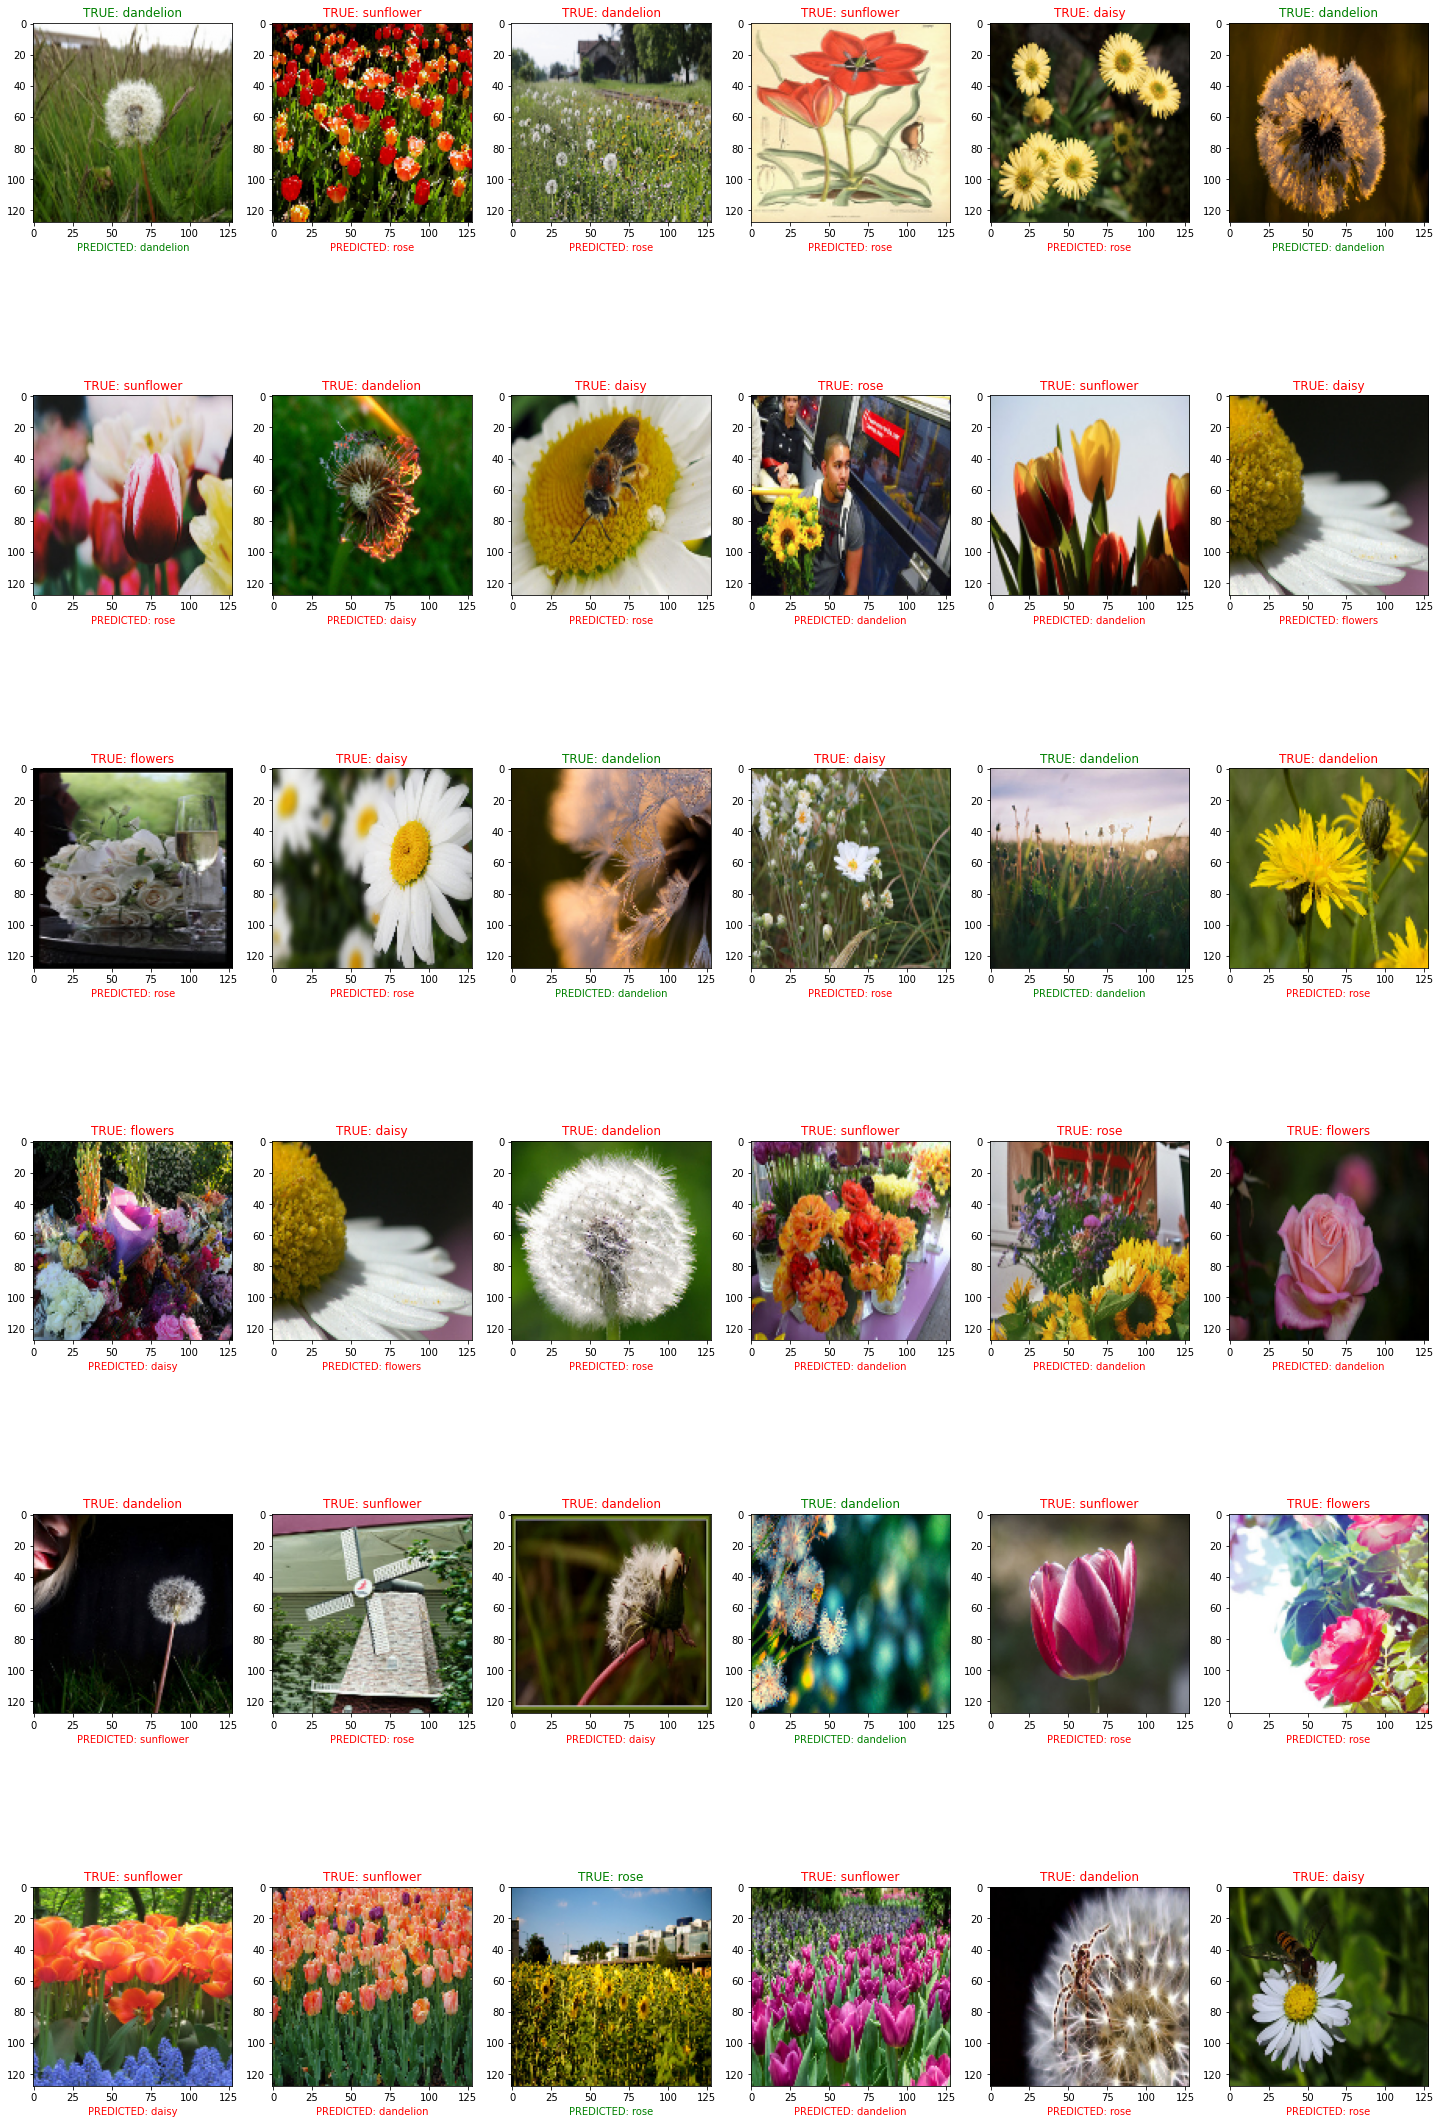

In [25]:
#now we will create a model if we can recognize flowers properly 
categories=np.sort(os.listdir(folder_dir))
fig,ax=plt.subplots(6,6,figsize=(25,40))

for i in range(6):
    for j in range(6):
        k=int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: "+categories[np.argmax(y_test[k])],color='green')
            ax[i,j].set_xlabel("PREDICTED: "+ categories[np.argmax(model.predict(x_test)[k])],color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE,SIZE,3),cmap='gray')
        else:
            ax[i,j].set_title("TRUE: "+categories[np.argmax(y_test[k])],color='red')
            ax[i,j].set_xlabel("PREDICTED: "+ categories[np.argmax(model.predict(x_test)[k])],color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE,SIZE,3),cmap='gray')
